In [1]:
#differentation in Pytorch
import torch
import matplotlib.pylab as plt

In [2]:
#finding the derivatives
x=torch.tensor(2.0,requires_grad=True)
print("the tensor x: ",x)
#create a tensor y according to y=x^2
y=x**2
print("the result of y=x^2: ",y)


the tensor x:  tensor(2., requires_grad=True)
the result of y=x^2:  tensor(4., grad_fn=<PowBackward0>)


In [3]:
#take the derivative
y.backward()
print("the derivative at x=2: ",x.grad)

the derivative at x=2:  tensor(4.)


In [5]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)


data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [6]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x000000000A4C1DA0>


G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


grad: None
is_leaf: False
requires_grad: True


In [8]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


In [10]:
#findding the derivative
x=torch.tensor(1.0,requires_grad=True)
y=2*x**3+x
print("the result of derivative: ",y)
y.backward()
print("the derivative at x=1: ",x.grad)

the result of derivative:  tensor(3., grad_fn=<AddBackward0>)
the derivative at x=1:  tensor(7.)


In [11]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [12]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [27]:
#partial derivatives
#u=v*u+u**2 at u=1,v=2
u=torch.tensor(1.0,requires_grad=True)
v=torch.tensor(2.0,requires_grad=True)
f=v*u+u**2
print("the result is: ",f)
f.backward()
print("the partial derivative is: ",u.grad)
print("the partial derivative is: ", v.grad)

the result is:  tensor(3., grad_fn=<AddBackward0>)
the partial derivative is:  tensor(4.)
the partial derivative is:  tensor(1.)


In [35]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

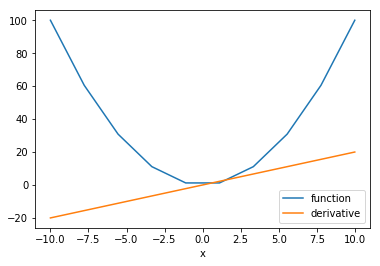

In [36]:
#take the derivative with respect to multiple values

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

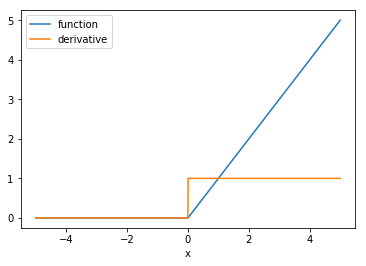

In [42]:
#let us calulate derivative of Relu function
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-5, 5, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()


In [43]:
y.grad_fn

In [44]:
#u=2 and v=1; f=uv+(uv)^2
#calculate the partial derivative
u=torch.tensor(2.0,requires_grad=True)
v=torch.tensor(1.0,requires_grad=True)
f=u*v+(u*v)**2
f.backward()
print("partial derivative w.r.t u:", u.grad)
print("partial derivative w.r.t v: ",v.grad)


partial derivative w.r.t u: tensor(5.)
partial derivative w.r.t v:  tensor(10.)
